# Work for Project: Roshan Ravichandran

In [1]:
import math
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from typing import Dict
import csv
from typing import NamedTuple
from scipy.spatial import distance
from collections import defaultdict
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
Vector = List[float]
pd.options.mode.chained_assignment = None 

In [2]:
original = pd.read_csv("vehicles.csv", engine = "python", encoding = "latin1")
#########
usedcars = original[["price", "year", "manufacturer", "condition", "cylinders", "odometer", "title_status", "transmission"]]
#########

In [3]:
#Consider only values which are finite, aka have no NaN value
newUsedCars = usedcars.dropna()

def find_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df.drop(df[(df[column] < lower_bound)].index, inplace = True)
    df.drop(df[(df[column] > upper_bound)].index, inplace = True)
    
find_outliers_iqr(newUsedCars, 'price')
find_outliers_iqr(newUsedCars, 'odometer')
find_outliers_iqr(newUsedCars, 'year')

##Turns string to int value
le = LabelEncoder()
newUsedCars['conditionint'] = le.fit_transform(newUsedCars['condition'])
newUsedCars["title_statusint"] = le.fit_transform(newUsedCars["title_status"])
newUsedCars["transmissionint"] = le.fit_transform(newUsedCars["transmission"])
newUsedCars["manufacturerint"] = le.fit_transform(newUsedCars["manufacturer"])
newUsedCars["cylindersint"] = le.fit_transform(newUsedCars["cylinders"])

# Bar Chart for relating the condition of a car and its price

<Axes: title={'center': 'Prices by Condition'}, xlabel='condition'>

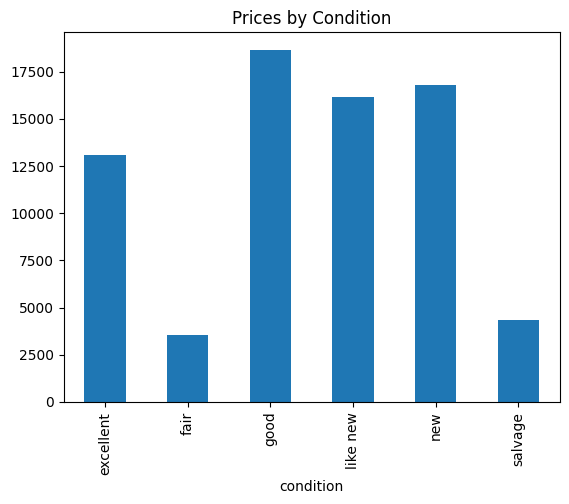

In [4]:
newUsedCars.groupby(["condition"])["price"].mean().plot(kind="bar", title="Prices by Condition")

#### As seen by this graph, the mean value of a car generally decreases as its condition gets worse, though one exception are cars in "good" condition, which has a slightly higher mean price than the other categories. This could be the result of most of the cars in the dataset having the "good" condition applied to them compared to the others

<Axes: title={'center': 'Prices by Car Status'}, xlabel='title_status'>

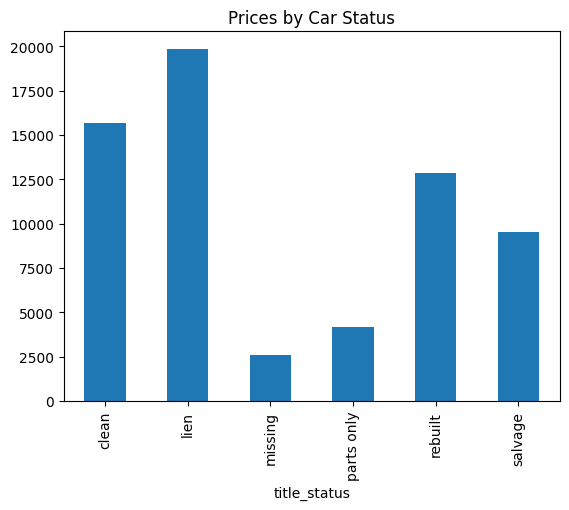

In [5]:
newUsedCars.groupby(["title_status"])["price"].mean().plot(kind="bar", title="Prices by Car Status")

#### The results from this graph are as expected, with cars that are more complete and finished being more valuable. Cars with a lien status ont hem are sold off at even higher prices than the rest, though the means are still closer together

<Axes: title={'center': 'Prices by Transmission Type'}, xlabel='transmission'>

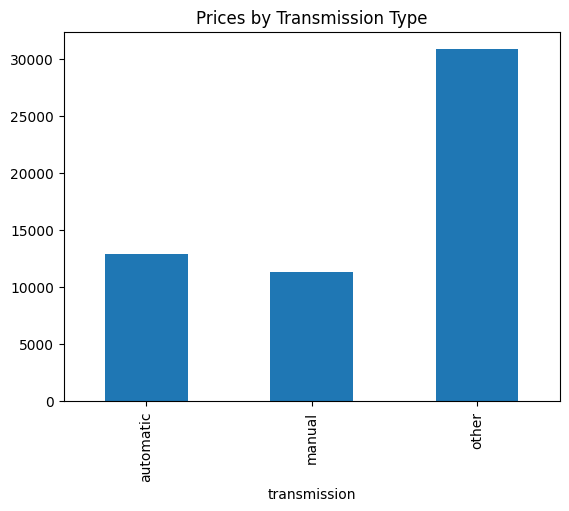

In [6]:
newUsedCars.groupby(["transmission"])["price"].mean().plot(kind="bar", title="Prices by Transmission Type")

#### There isn't much difference between the mean prices of the types of transmissions, though cars with alternative transmissions are more valuable overall.

<Axes: title={'center': 'Prices by Manufacturer'}, xlabel='manufacturer'>

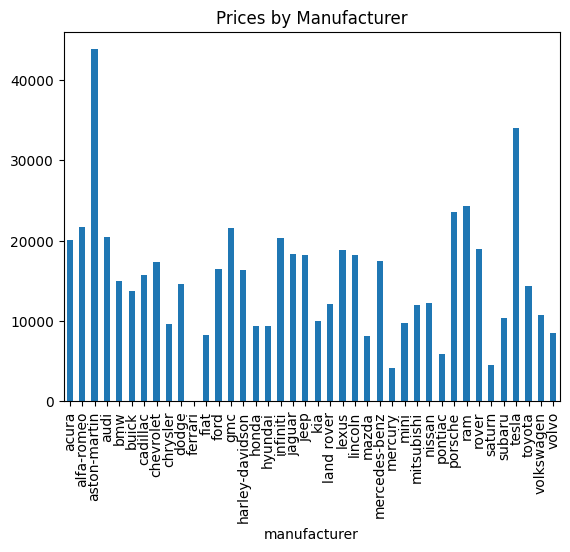

In [7]:
newUsedCars.groupby(["manufacturer"])["price"].mean().plot(kind="bar", title="Prices by Manufacturer")

#### There are strong differences among the mean prices of cars by their manufacutrer. Generally more high-class manufactuers like Alfa-Romeo and Aston-Martin are far more valuable than more general car manufacturers like Chevrolet and Ford.

<Axes: title={'center': 'Prices by Number of Cylinders'}, xlabel='cylinders'>

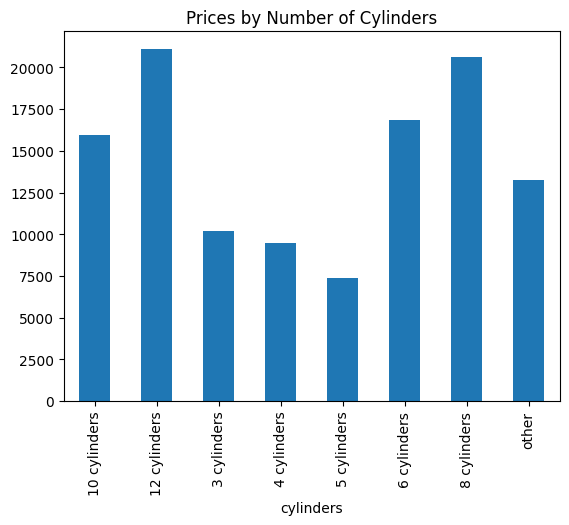

In [8]:
newUsedCars.groupby(["cylinders"])["price"].mean().plot(kind="bar", title="Prices by Number of Cylinders")

#### Though both 10-cylinder and 5-cylinder cars break from this trend, the mean price of a car generally increases as the number of cylinders increases giving a somewhat linear relationship between cylinders and prices.

## Scatterplot between the age of the car and the price

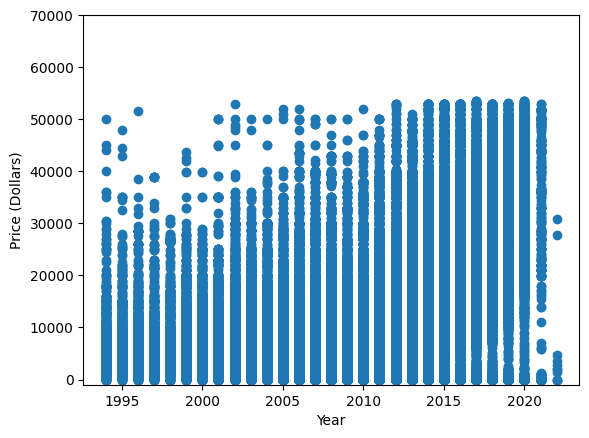

In [9]:
#Setting up a scatter plot between the year and the price
fig, ax = plt.subplots()
year = newUsedCars["year"]
price = newUsedCars["price"]
ax.scatter(year, price)
"""
# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
noNaN = np.isfinite(year) & np.isfinite(price)
m, b = np.polyfit(year[noNaN], price[noNaN], deg=1)
ax.plot(year, m * year + b, color="red")
"""
#labels
plt.xlabel("Year")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view
plt.ylim(-1000, 70000)
plt.show()
#plt.xlim(1900, 2022)

#### Looking at this graph, there seems to be a slightly positive relationship between the year and the price. However, there are peaks and troughs within the dataset as time goes on

## Plotting the relationship between the mileage and the price

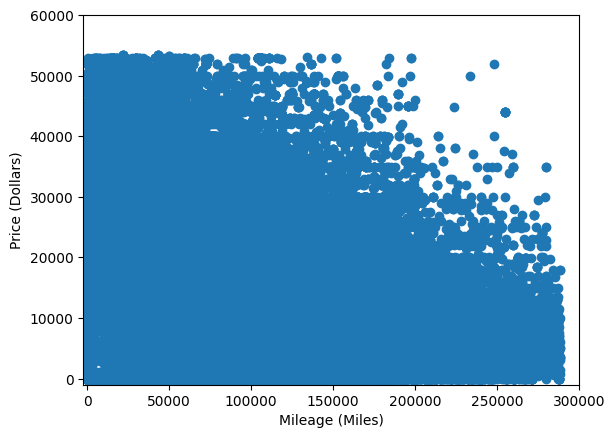

In [10]:
#Setting up a scatter plot between the mileage and the price
fig, ax = plt.subplots()
mileage = newUsedCars["odometer"]
price = newUsedCars["price"]

#plotting the line
ax.scatter(mileage, price)

# Creating a regression line to show the trend
#Consider only values which are finite, aka have no NaN value
#noNaN = np.isfinite(mileage) & np.isfinite(price)
#m, b = np.polyfit(mileage[noNaN], price[noNaN], deg=1)
#ax.plot(mileage, m * mileage + b, color="red")

#labels
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (Dollars)")

# setting the limits to make it easy to view
plt.ylim(-1000, 60000)
plt.xlim(-2500, 300000)
plt.show()

#### Unlike the relationship between the year and the price, the relationship between the mileage of a car and its price is negative, meaning that the more a car has been driven, the lower its price becomes

## Heat Map of Correlations

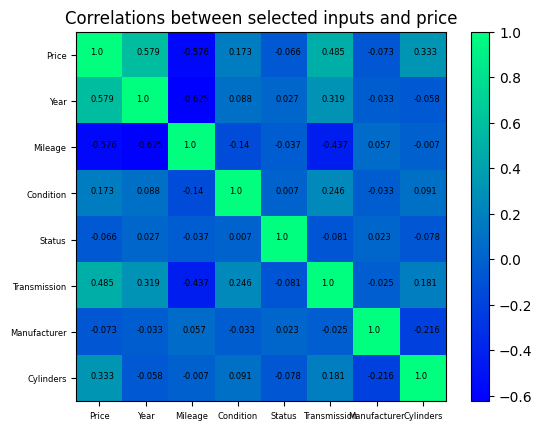

In [11]:


correlations = newUsedCars[["price", "year", "odometer", "conditionint", "title_statusint", "transmissionint", "manufacturerint", "cylindersint"]].corr()
#Setting the axes up
ax = plt.axes()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(["Price", "Year", "Mileage", "Condition", "Status", "Transmission", "Manufacturer", "Cylinders"], fontsize = 6)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(["Price", "Year", "Mileage", "Condition", "Status", "Transmission", "Manufacturer", "Cylinders"], fontsize = 6)

#Setting the title
plt.title("Correlations between selected inputs and price")
plt.imshow(correlations, cmap="winter")
plt.colorbar()
for i in range(8):
    for j in range(8):
        plt.annotate(str(round(correlations.values[i][j], 3)), xy=(j - 0.2, i), fontsize=6)

## Line Graph (To Be Done, most likely undoable)

(-5000.0, 200000.0)

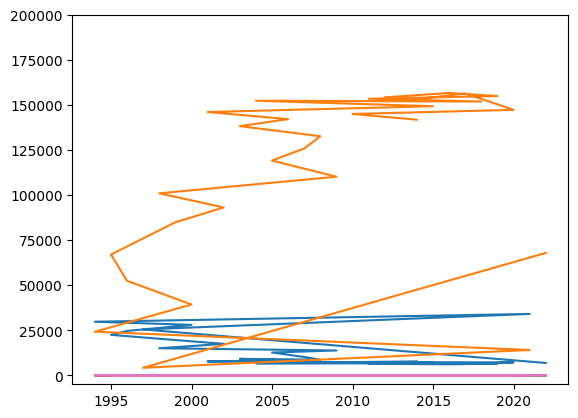

In [12]:
fig, ax = plt.subplots()
years = (year).unique()
yearmeans = newUsedCars.groupby(year).mean(numeric_only=True)
ax.plot(years, yearmeans)
plt.ylim(-5000, 200000)

## Box Plot for price

Text(0.5, 1.0, 'Boxplot for the price of used cars')

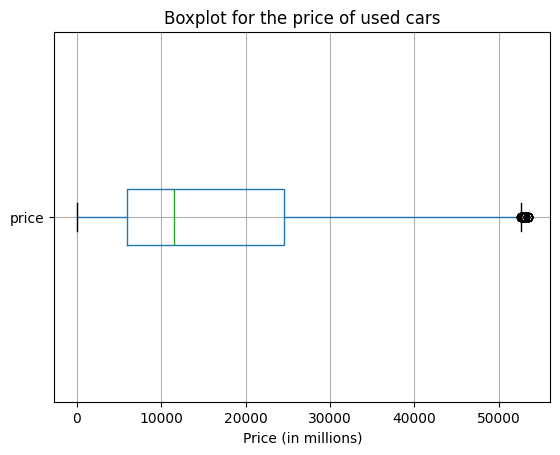

In [13]:
newUsedCars.boxplot(column=["price"], vert=False, xlabel="Price (in millions)")
plt.title("Boxplot for the price of used cars")

#### As shown by the boxplot, when major outliers are removed from the data set, the price of most cars tends to sit in the 10,000 to 20,000 dollar range. The data is somewhat skewed right, but not to a troubling extent that can get in the way of accurate testing.

## Setup for Quadratic Regression testing (In Progress)

In [14]:
Inputs = newUsedCars[["year", "odometer", "conditionint", "title_statusint", "transmissionint", "manufacturerint", "cylindersint"]]
Price = newUsedCars["price"]
trainerX, testerX, trainerY, testerY = train_test_split(Inputs, Price, test_size=0.2, random_state=27)

In [15]:
PolyRegress = PolynomialFeatures(2)
polyFTrainer = PolyRegress.fit_transform(trainerX)
polyFTester = PolyRegress.fit_transform(testerX)
polyM = linear_model.LinearRegression()
polyM.fit(polyFTrainer, trainerY)
trainerYPredictions = polyM.predict(polyFTrainer)
testerYPredictions = polyM.predict(polyFTester)
print(f'Mean squared error: {root_mean_squared_error(testerYPredictions, testerY)}')
print(f'Mean absolute error: {mean_absolute_error(testerYPredictions, testerY)}')
print(f'Correlation coefficients: {polyM.coef_}')
print(f'R-Squared: {r2_score(testerYPredictions, testerY)}')

Mean squared error: 7548.778991435126
Mean absolute error: 4990.424454650297
Correlation coefficients: [-1.76314378e-01 -1.61439893e+05  1.66443959e+00 -1.09339864e+05
  5.61491029e+04  5.60163855e+05 -2.97729372e+03 -3.70653068e+05
  4.01937490e+01 -8.53049984e-04  5.48415270e+01 -2.79278971e+01
 -2.78227453e+02  1.44916583e+00  1.82138159e+02  7.98745522e-08
 -3.14627129e-03  2.96206161e-03 -1.16304011e-02  4.13247885e-04
 -2.99745222e-03 -2.58061833e+02 -7.79506837e+01  1.58359693e+03
 -1.08704477e+01  5.18475862e+01 -1.80968472e+02 -1.76697701e+02
  7.07633601e+00 -6.77024994e+00 -2.37723067e+02 -5.17304309e+00
  9.85212635e+01  1.59369956e+00  1.51950230e+00  9.12787012e+02]
R-Squared: 0.4052251029567936
